In [1]:
import json
import matplotlib.patches as mpatches
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load Dataset

In [2]:
image_val_path = 'bdd100k/images/100k/train/'
label_path = 'bdd100k/labels/bdd100k_labels_images_train.json'
save_label_path = 'bdd100k/labels/bdd100k_labels_images_train_highway_lane.json'

In [3]:
# image_val_path = 'bdd100k/images/100k/val/'
# label_path = 'bdd100k/labels/bdd100k_labels_images_val.json'
# save_label_path = 'bdd100k/labels/bdd100k_labels_images_val_highway_lane.json'

In [4]:
json_file = open(label_path, 'r')
labels_json = json.load(json_file)

# Keys

In [5]:
labels_json[0].keys()

dict_keys(['attributes', 'timestamp', 'labels', 'name'])

In [6]:
labels_json[0]['labels'][0].keys()

dict_keys(['manualAttributes', 'box2d', 'category', 'id', 'attributes', 'manualShape'])

In [7]:
labels_json[0]['attributes'].keys()

dict_keys(['weather', 'timeofday', 'scene'])

In [8]:
labels_json[0]['attributes']

{'scene': 'city street', 'timeofday': 'daytime', 'weather': 'clear'}

# Pandas Dataframe

In [9]:
df = pd.DataFrame(labels_json)

In [10]:
print(len(df))
df.head()

69863


,attributes,labels,name,timestamp
0,"{'weather': 'clear', 'timeofday': 'daytime', '...","[{'manualAttributes': True, 'box2d': {'x2': 11...",0000f77c-6257be58.jpg,10000
1,"{'weather': 'clear', 'timeofday': 'dawn/dusk',...","[{'manualAttributes': True, 'box2d': {'x2': 30...",0000f77c-62c2a288.jpg,10000
2,"{'weather': 'clear', 'timeofday': 'dawn/dusk',...","[{'manualAttributes': True, 'box2d': {'x2': 64...",0000f77c-cb820c98.jpg,10000
3,"{'weather': 'clear', 'timeofday': 'night', 'sc...","[{'manualAttributes': True, 'box2d': {'x2': 56...",0001542f-5ce3cf52.jpg,10000
4,"{'weather': 'clear', 'timeofday': 'night', 'sc...","[{'manualAttributes': True, 'box2d': {'x2': 56...",0001542f-7c670be8.jpg,10000


# Search highway seans

In [11]:
df_highway = df[df.apply(lambda x: x['attributes']['scene'], axis=1) == 'highway']

In [12]:
# df_highway_night = df_highway[df_highway.apply(lambda x: x['attributes']['timeofday'], axis=1) == 'night']

In [13]:
# df_highway_night = df_highway_night.reset_index(drop=True)

In [14]:
# print(len(df_highway_night))
# df_highway_night.head()

In [15]:
df_highway = df_highway.reset_index(drop=True)
df_highway.head()

,attributes,labels,name,timestamp
0,"{'weather': 'clear', 'timeofday': 'dawn/dusk',...","[{'manualAttributes': True, 'box2d': {'x2': 30...",0000f77c-62c2a288.jpg,10000
1,"{'weather': 'clear', 'timeofday': 'night', 'sc...","[{'manualAttributes': True, 'box2d': {'x2': 56...",0001542f-7c670be8.jpg,10000
2,"{'weather': 'rainy', 'timeofday': 'night', 'sc...","[{'manualAttributes': True, 'box2d': {'x2': 56...",0004974f-05e1c285.jpg,10000
3,"{'weather': 'clear', 'timeofday': 'night', 'sc...","[{'manualAttributes': True, 'box2d': {'x2': 74...",00067cfb-5adfaaa7.jpg,10000
4,"{'weather': 'clear', 'timeofday': 'daytime', '...","[{'manualAttributes': True, 'box2d': {'x2': 61...",00067cfb-caba8a02.jpg,10000


In [16]:
df_highway['attributes'][0]

{'scene': 'highway', 'timeofday': 'dawn/dusk', 'weather': 'clear'}

# Search parallel four lanes seans

In [17]:
df_highway_lane = pd.DataFrame()

for i in range(len(df_highway)):
    tmp_se = df_highway.iloc[i]
    tmp_label = df_highway.iloc[i]['labels']
    
    lane_count = 0
    except_flag = False
    for j in range(len(tmp_label)):
        if tmp_label[j]['category'] == 'lane':
            if tmp_label[j]['attributes']['laneDirection'] == 'parallel':
                lane_count += 1
            elif tmp_label[j]['attributes']['laneDirection'] == 'vertical':
                except_flag = True
        elif tmp_label[j]['category'] == 'traffic light':
                except_flag = True

    if lane_count >= 4 and except_flag == False:
        df_highway_lane = df_highway_lane.append(tmp_se)

In [18]:
df_highway_lane = df_highway_lane.reset_index(drop=True)

In [19]:
print(len(df_highway_lane))
df_highway_lane.head()

10460


,attributes,labels,name,timestamp
0,"{'weather': 'clear', 'timeofday': 'dawn/dusk',...","[{'manualAttributes': True, 'box2d': {'x2': 30...",0000f77c-62c2a288.jpg,10000.0
1,"{'weather': 'rainy', 'timeofday': 'night', 'sc...","[{'manualAttributes': True, 'box2d': {'x2': 56...",0004974f-05e1c285.jpg,10000.0
2,"{'weather': 'clear', 'timeofday': 'night', 'sc...","[{'manualAttributes': True, 'box2d': {'x2': 74...",00067cfb-5adfaaa7.jpg,10000.0
3,"{'weather': 'undefined', 'timeofday': 'dawn/du...","[{'manualAttributes': True, 'box2d': {'x2': 33...",0008a165-c48f4b3e.jpg,10000.0
4,"{'weather': 'overcast', 'timeofday': 'daytime'...","[{'manualAttributes': True, 'box2d': {'x2': 29...",0028cbbf-92f30408.jpg,10000.0


# Show

In [20]:
data_example_name = df_highway_lane.iloc[0]['name']

In [21]:
img_path = image_val_path + data_example_name
img = mpimg.imread(img_path)
img_path

'bdd100k/images/100k/train/0000f77c-62c2a288.jpg'

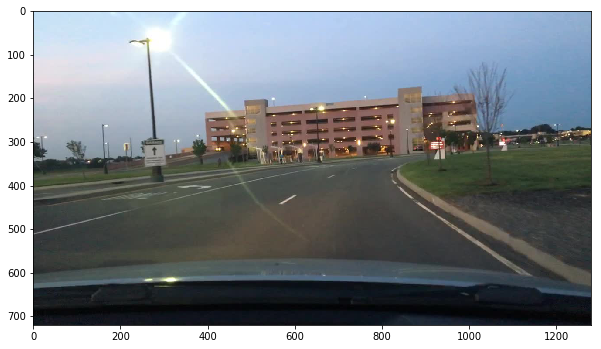

In [22]:
fig = plt.figure(figsize=(10,10))
plt.plot()
plt.imshow(img)

# pandas dataframe -> dict

In [23]:
dict_highway_lane = df_highway_lane.to_dict(orient='index')

# dict -> list

In [24]:
list_highway_lane = list(dict_highway_lane.items())

# delete list index

In [25]:
list_highway_lane[0][0]

0

In [26]:
l = list_highway_lane
list_highway_lane_delete_index = list([v[1] for v in l])

# Save into a json file with indent

In [27]:
with open(save_label_path, 'w') as f:
    json.dump(list_highway_lane_delete_index, f, indent=4)

# Result 

In [28]:
print(len(df), '->', len(df_highway), '->', len(df_highway_lane))

69863 -> 17379 -> 10460
